In [1]:
%matplotlib notebook
import sys
sys.path.append('../code')

from mpl_toolkits.mplot3d import Axes3D
from krr import KernelRidgeRegression, krr
from label_data import LabelData
import numpy as np
import matplotlib.pyplot as plt
from mnist_load import load_mnist_data

In [2]:
def k_polynomial(x, xp, d):
    return (np.dot(x, xp)+1)**d


def k_gaussian(x, xp, sigma):
    return np.exp(-np.sum((x-xp)**2)/(2*(sigma**2)))


def k_sigmoid(x, xp, kappa, Theta):
    return np.tanh(kappa * np.dot(x, xp) + Theta)

In [3]:
usage = 0.1
ratio = 0.5
s0, s1 = 0,4
mnist, names = load_mnist_data(s0, s1, ratio, usage)

In [4]:
print("MNIST Training Dimensions: (%d, %d)\nMNIST Validation Dimensions: (%d, %d)" % (*mnist.training[0].shape, 
                                                                                      *mnist.validation[0].shape))

MNIST Training Dimensions: (686, 784)
MNIST Validation Dimensions: (687, 784)


In [5]:
def view_digits(ax, digits, nx, ny):
    width = int(np.sqrt(digits.shape[1]))
    img = np.zeros((nx*width, ny*width))
    idx = 0
    for i in range(0, nx):
        for j in range(0, ny):
            img[i*width:i*width+width, j*width:j*width+width] = digits[idx].reshape((width, width))
            idx += 1
    ax.imshow(img, extent=[0, 1, 0, 1])
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)

<IPython.core.display.Javascript object>


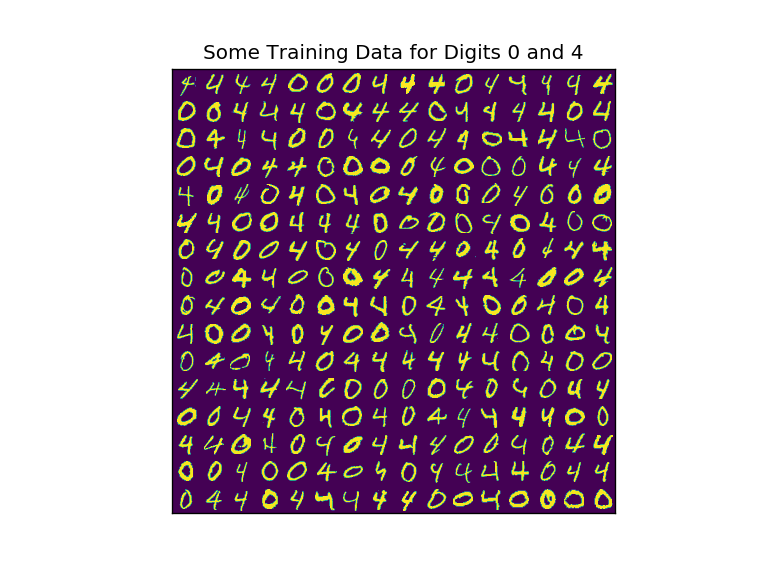

In [6]:
fig, ax = plt.subplots()
view_digits(ax, mnist.training[0][0:256], 16, 16)
plt.title("Some Training Data for Digits %d and %d" % (s0, s1))
plt.show()

In [16]:
ld = LabelData()
print(mnist.training[0].shape, mnist.training[1].shape)
ld.add_data(mnist.training[0], mnist.training[1])
kregr = KernelRidgeRegression(ld, k=lambda x,y: k_polynomial(x, y, 2), l=.0001)

(686, 784) (686,)


In [17]:
y_r = np.array([krr(ld, kregr._alpha, lambda x,y: k_polynomial(x, y, 2), x) for x in mnist.validation[0]])
print(y_r)

[ 1.65422575e-01 -1.80213399e-01  1.01472595e+00  8.50688486e-02
 -7.33355835e-02 -3.36415789e-02  9.26955165e-01  5.26681637e-01
  9.08039284e-01  5.26094676e-02  8.38062866e-01  8.63728570e-01
  4.52442613e-01  3.36604727e-02 -2.40096331e-02 -1.93480140e-02
  3.36883723e-02  8.28952827e-01 -1.29982408e-02 -1.06061074e-02
  1.26384521e+00  7.89461959e-01  1.17957954e+00  1.12291258e+00
  3.38424292e-02  8.78979632e-01 -3.47150163e-02  1.16427206e+00
  8.97580808e-01  9.98434007e-01  1.02129471e+00 -8.31908042e-02
  1.20359156e+00 -3.51699184e-02 -6.45400064e-02  5.23843265e-01
  8.12098308e-01  1.10625407e+00  5.82185693e-01  2.73030731e-02
 -1.27291414e-02  7.73551920e-01  7.66508073e-01  7.59865943e-01
  9.17570559e-01  6.79465645e-02  8.89074265e-01  9.42055082e-01
  1.07436135e+00 -6.26755776e-02  7.11586797e-01  3.44610756e-02
 -1.36470950e-02  7.72008453e-01  1.22687459e+00  1.09129902e+00
  5.79840539e-01  9.55160367e-01 -3.22894042e-02 -1.60276735e-01
 -3.54005760e-02  7.38879

In [18]:
y_r= np.round(y_r)
print(y_r)

[ 0. -0.  1.  0. -0. -0.  1.  1.  1.  0.  1.  1.  0.  0. -0. -0.  0.  1.
 -0. -0.  1.  1.  1.  1.  0.  1. -0.  1.  1.  1.  1. -0.  1. -0. -0.  1.
  1.  1.  1.  0. -0.  1.  1.  1.  1.  0.  1.  1.  1. -0.  1.  0. -0.  1.
  1.  1.  1.  1. -0. -0. -0.  1.  0.  0.  1. -0.  0.  1. -0.  0.  0. -0.
  0. -0.  0.  1. -0. -0.  1. -0.  0.  1.  1. -0.  0.  0.  1.  1.  1.  0.
  0. -0.  1. -0.  0.  1.  1. -0.  1.  0. -0.  1. -0.  0.  1. -0.  0.  0.
  1.  1.  1.  1. -0.  1. -0.  0. -0. -0.  1.  0.  1.  1. -0.  0.  1.  1.
 -0.  1.  1.  1.  1.  0.  0.  1.  0.  0.  1.  1.  1.  0.  1.  1.  0.  1.
  1. -0.  1.  1.  1.  0.  1. -0. -0. -0.  0.  1.  1.  1.  1.  0.  0.  1.
 -0.  0.  1.  0.  1.  0.  1. -0.  0.  0.  0.  1.  1.  1.  0.  0. -0.  1.
 -0.  1. -0.  0.  0.  1.  0.  1.  0.  1.  1.  0. -0.  1.  0.  1.  1. -0.
  1. -0.  0.  1.  0.  0.  1. -0.  1.  1. -0. -0. -0.  1.  1.  1.  0.  0.
  0. -0.  1.  1.  0.  0.  1.  1. -0. -0.  0. -0.  1.  1.  0.  0.  1.  1.
  0.  1.  1. -0.  1.  1.  0.  0.  0.  0. -0.  1.  1

In [19]:
def risk(y, yp):
    return 1/(np.size(y))*np.sum(0.5*np.abs(y - yp))

In [20]:
risk(mnist.validation[1], y_r)

0.010189228529839884